# PyData 2022 Charting competition

make the notebook reproducible, these are required by 
```python
pd.read_parquet
```

In [ ]:
%pip  install pyarrow
%pip install fastparquet

this is required for the git extension

In [ ]:
%pip install jupyterlab-git

In [1]:
import pandas as pd

df = pd.read_parquet("./option_chain_data.parquet")

In [2]:
df.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,date,ticker,type
0,GOOG220617C00700000,2022-01-05 17:22:59+00:00,700.0,2121.21,2050.8,2066.0,-106.91992,-4.79864,1.0,205.0,9.810185,1.0,REGULAR,USD,2022-05-19,GOOG,Call
1,GOOG220617C00720000,2021-11-08 18:25:44+00:00,720.0,2277.80,2246.3,2265.0,0.00000,0.00000,20.0,108.0,0.000000,1.0,REGULAR,USD,2022-05-19,GOOG,Call
2,GOOG220617C00740000,2021-11-10 11:51:11+00:00,740.0,2013.89,2226.2,2242.1,0.00000,0.00000,2.0,112.0,17.746342,1.0,REGULAR,USD,2022-05-19,GOOG,Call
3,GOOG220617C00760000,2021-11-10 11:51:11+00:00,760.0,1974.24,2206.9,2222.1,0.00000,0.00000,44.0,95.0,15.505127,1.0,REGULAR,USD,2022-05-19,GOOG,Call
4,GOOG220617C00780000,2021-11-10 11:51:11+00:00,780.0,2088.11,2187.7,2204.0,0.00000,0.00000,2.0,121.0,14.298585,1.0,REGULAR,USD,2022-05-19,GOOG,Call


In [6]:
df['ticker'].describe()

count      299
unique       1
top       GOOG
freq       299
Name: ticker, dtype: object

In [48]:
df['type'].unique()

array(['Call', 'Put'], dtype=object)

<AxesSubplot:title={'center':'Call'}, xlabel='lastTradeDate', ylabel='lastPrice'>

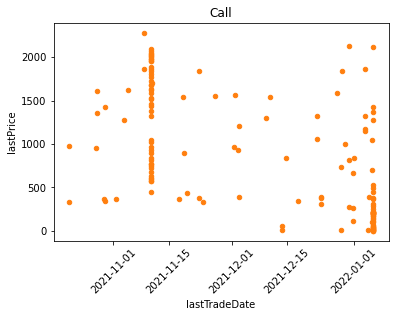

In [49]:
df.query('type=="Call"').plot(kind='scatter',x='lastTradeDate',y='lastPrice',rot=45,\
        color= "tab:orange",title='Call')

<AxesSubplot:>

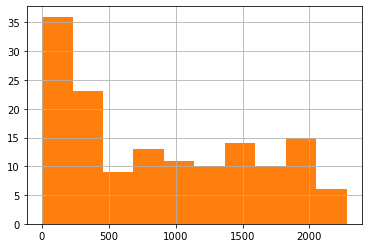

In [50]:
df.query('type=="Call"')['lastPrice'].hist(color= "tab:orange")

<AxesSubplot:title={'center':'Put'}, xlabel='lastTradeDate', ylabel='lastPrice'>

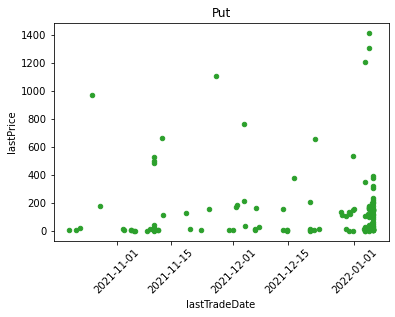

In [37]:
df.query('type=="Put"').plot(kind='scatter',x='lastTradeDate',y='lastPrice',rot=45,\
        color= "tab:green",title='Put')

<AxesSubplot:>

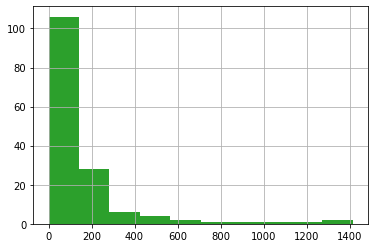

In [47]:
df.query('type=="Put"')['lastPrice'].hist(color= "tab:green")

In [23]:
df['date'].value_counts()

2022-05-19    299
Name: date, dtype: int64

In [18]:
df.corr()

,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney
strike,1.000000,-0.350763,-0.368835,-0.365694,-0.051116,-0.137423,-0.056543,0.119015,-0.530406,-0.007865
lastPrice,-0.350763,1.000000,0.966185,0.966393,0.012045,-0.015513,-0.095757,-0.154942,0.848728,0.626343
bid,-0.368835,0.966185,1.000000,0.999969,0.023975,-0.008621,-0.099350,-0.163118,0.877332,0.663278
ask,-0.365694,0.966393,0.999969,1.000000,0.023816,-0.008084,-0.100022,-0.163190,0.876182,0.665627
change,-0.051116,0.012045,0.023975,0.023816,1.000000,0.621520,0.009866,0.024750,-0.035940,0.215650
percentChange,-0.137423,-0.015513,-0.008621,-0.008084,0.621520,1.000000,0.027440,0.102928,-0.093113,0.317801
volume,-0.056543,-0.095757,-0.099350,-0.100022,0.009866,0.027440,1.000000,0.063384,-0.050398,-0.113650
openInterest,0.119015,-0.154942,-0.163118,-0.163190,0.024750,0.102928,0.063384,1.000000,-0.120300,-0.079069
impliedVolatility,-0.530406,0.848728,0.877332,0.876182,-0.035940,-0.093113,-0.050398,-0.120300,1.000000,0.396766
inTheMoney,-0.007865,0.626343,0.663278,0.665627,0.215650,0.317801,-0.113650,-0.079069,0.396766,1.000000
